In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load & Read Data

In [260]:
df = pd.read_csv("C:/Users/Asus/Documents/Zumar/german-credit-risk/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## Quick Look

In [56]:
#dimension
df.shape

(1000, 10)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


# Preprocessing Data

## Identify Missing Values

In [271]:
mv = df.isnull().sum()
mv = pd.DataFrame(mv)
mv['Percentage'] = mv[0] / 1723065 *100
mv

#kolom '0' adalah kolom yang berisi banyaknya missing value pada variabel terkait
#kolom 'Percentage' adalah kolom yang berisi persentase missing value pada variabel terkait

,0,Percentage
Unnamed: 0,0,0.000000
Age,0,0.000000
Sex,0,0.000000
Job,0,0.000000
Housing,0,0.000000
Saving accounts,183,0.010621
Checking account,394,0.022866
Credit amount,0,0.000000
Duration,0,0.000000
Purpose,0,0.000000


## Drop data yang tidak diperlukan

In [275]:
#Variabel 'Unnamed: 0' didrop karena tidak diperlukan dalam proses analisis
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

## Imputasi missing value

Imputasi missing value pada data kategorikal menggunakan modus.

In [272]:
mmodus = ['Saving accounts', 'Checking account']
for feature in mmodus:
    if feature in df.columns.values:
        df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

In [273]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

# Exploratory Data Analysis

In [276]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [153]:
kategori = df[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']]
kategori.describe()

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,1000,1000,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,786,668,337


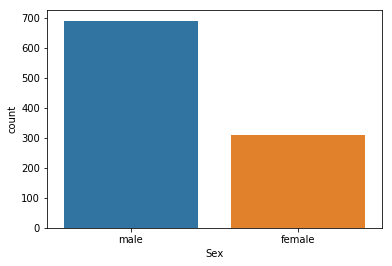

<Figure size 1440x720 with 0 Axes>

In [64]:
sns.countplot(x = kategori.Sex)
plt.figure(figsize = (20,10))
plt.show()

Berdasarkan visualisasi di atas, customer yang melakukan kredit lebih banyak berjenis kelamin laki-laki dibanding perempuan.

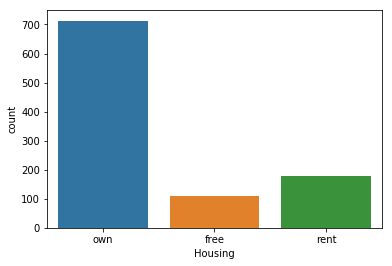

<Figure size 1440x720 with 0 Axes>

In [65]:
sns.countplot(x = kategori.Housing)
plt.figure(figsize = (20,10))
plt.show()

Customer yang melakukan kredit mayoritas memiliki rumah sendiri dan sebagian kecil customer tidak memiliki rumah atau tinggal dengan menyewa rumah.

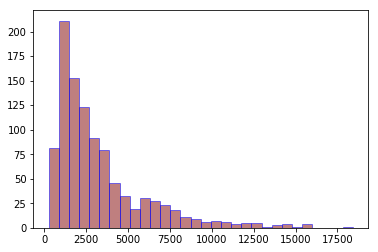

In [67]:
plt.hist(df['Credit amount'], 
         facecolor='maroon', 
         edgecolor='blue', 
         bins=30,
         alpha = 0.5)
plt.show()

Histogram di atas berbentuk skewness positif, di mana banyak customer yang memiliki besar kredit di bawah $5000.

In [68]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

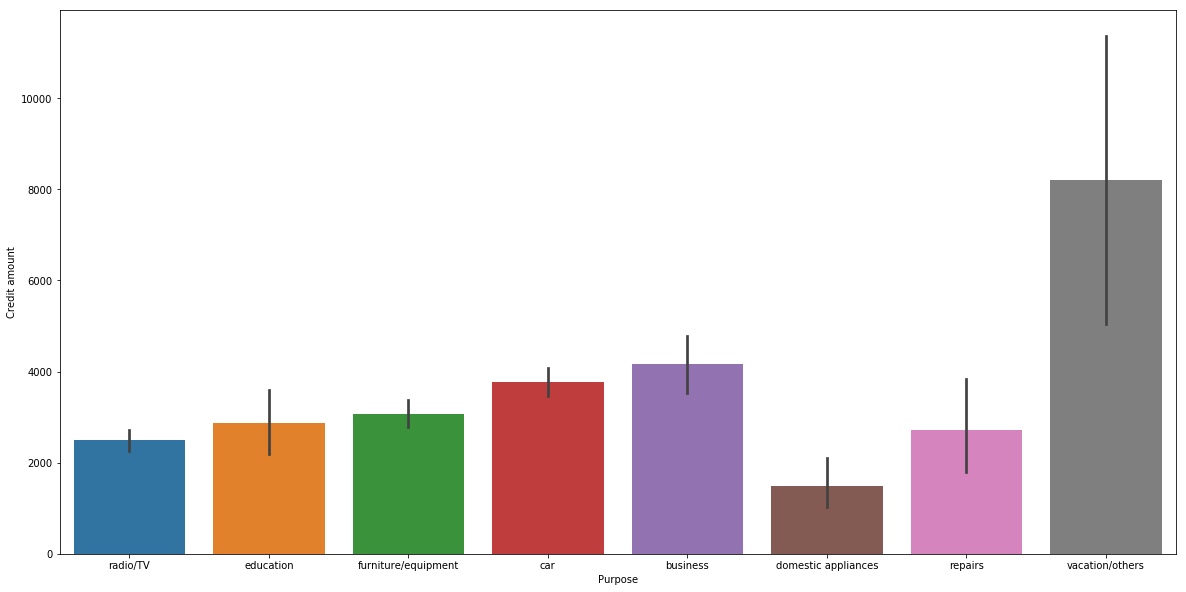

In [69]:
plt.figure(figsize = (20,10))
sns.barplot(x = df['Purpose'], y = df['Credit amount'])
plt.show()

Berdasarkan visualisasi di atas, sebagian besar customer yang melakukan kredit memiliki tujuan untuk melakukan vacation atau hal lainnya.

In [44]:
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education


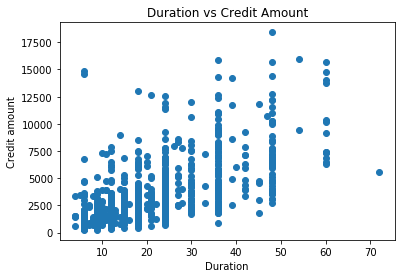

In [45]:
plt.scatter(df['Duration'],df['Credit amount'])
plt.title('Duration vs Credit Amount')
plt.xlabel('Duration')
plt.ylabel('Credit amount')
plt.show()

Berdasarkan data yang dimiliki, customer lebih banyak melakukan kredit dalam durasi di bawah 30 dengan jumlah pinjaman di bawah $5000.

#### Korelasi

In [154]:
from sklearn.preprocessing import LabelEncoder
for feature in kategori:
    if feature in df.columns.values:
        df[feature] = LabelEncoder().fit_transform(df[feature])
        
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


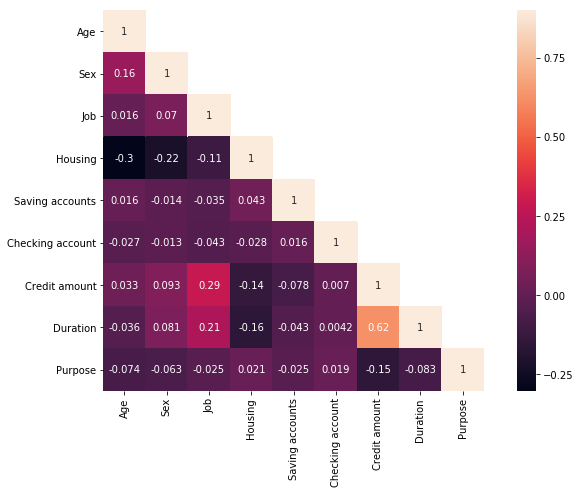

In [47]:
#create correlation
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,15))
fig.set_size_inches(12, 7)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Berdasarkan visualisasi di atas, terlihat bahwa terdapat korelasi positif yang cukup tinggi antara duration dengan purpose. Hal ini berarti bahwa semakin lama durasi kredit, semakin besar juga tujuan customer yang melatarbelakangi pengajuan kredit.

# Clustering

In [155]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [25]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [156]:
# Konversi Dataset ke Data Array 
X = df.values[:,0:]
X

array([[  67,    1,    2, ..., 1169,    6,    5],
       [  22,    0,    2, ..., 5951,   48,    5],
       [  49,    1,    1, ..., 2096,   12,    3],
       ...,
       [  38,    1,    2, ...,  804,   12,    5],
       [  23,    1,    2, ..., 1845,   45,    5],
       [  27,    1,    2, ..., 4576,   45,    1]], dtype=int64)

Klastering pada kali ini menggunakan algoritma k-means, hierarchical clustering (ward, single lingkage, average linkage, dan complete linkage), dan DBSCAN.

### K-Means

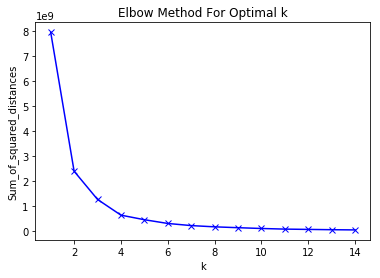

In [157]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan visualisasi di atas, k = 4.

In [158]:
k_means = KMeans(init = 'k-means++', n_clusters = 4)
k_means.fit(X)
print(k_means.labels_)

[0 1 0 1 2 1 2 1 2 2 0 2 0 0 0 0 0 1 3 2 0 2 0 0 0 0 0 0 0 1 0 2 1 0 0 2 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 2 0 0 1 1 0 1 0 0 0 3 2 2 0 0 0 0 1 0 0 1
 0 0 2 2 1 2 1 0 0 0 0 0 0 3 0 0 0 0 0 2 0 3 0 2 0 1 0 0 0 0 0 3 1 1 1 0 0
 0 1 1 0 2 1 0 2 0 0 2 0 0 0 0 0 0 0 2 1 1 2 0 3 0 1 0 2 0 0 2 2 0 0 2 0 0
 1 0 0 0 1 1 1 0 0 0 2 0 2 0 0 1 0 2 0 0 2 0 0 0 0 0 2 1 2 0 0 0 1 2 0 2 0
 0 2 0 0 2 2 2 2 0 2 0 0 0 2 2 0 0 2 0 0 3 0 0 1 0 2 2 2 0 2 0 2 2 2 0 0 0
 0 2 2 2 3 1 0 2 2 0 0 0 0 0 3 2 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 1 2 0 2
 0 0 0 2 2 0 0 1 0 1 0 2 0 3 2 3 2 0 0 2 0 2 0 0 0 2 3 2 1 0 0 0 1 1 2 1 3
 2 0 0 2 0 2 0 0 3 0 2 0 0 0 1 1 2 0 0 2 0 2 0 2 2 0 2 2 0 2 1 0 2 0 1 0 1
 3 2 2 0 0 2 0 1 2 2 2 2 0 0 2 0 0 0 0 2 1 0 0 0 2 0 0 0 2 0 0 0 0 2 2 2 2
 2 1 0 3 3 1 0 0 3 0 0 3 0 0 2 0 0 1 0 0 0 0 2 0 0 3 2 0 0 0 0 0 1 0 2 0 0
 0 2 0 0 1 0 0 0 1 2 1 2 0 2 0 0 0 2 2 2 0 0 0 2 3 0 0 0 0 0 0 2 0 0 0 2 0
 2 0 0 2 0 0 3 0 2 2 2 2 2 2 0 2 2 0 2 0 0 2 0 1 2 2 2 0 0 0 0 2 2 2 0 0 2
 0 2 0 0 0 2 2 0 2 0 1 0 

In [219]:
#Mengonvert label cluster ke dalam DataFrame
df['label_kmeans'] = pd.DataFrame(k_means.labels_)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label_kmeans
0,67,1,2,1,0,0,1169,6,5,0
1,22,0,2,1,0,1,5951,48,5,1
2,49,1,1,1,0,0,2096,12,3,0
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,2


Untuk visualisasi, dilakukan PCA (principal component analysis) untuk mereduksi dimensi menjadi 3.

In [163]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2', 'PC 3'])

In [164]:
finalDf = pd.concat([principalDf, cluster[['label_kmeans']]], axis = 1)
finalDf.head()

,PC 1,PC 2,PC 3,label_kmeans
0,-2102.286319,32.863167,3.391214,3
1,2679.802746,-17.313851,-17.092796,0
2,-1175.275846,14.428864,3.207441,3
3,4610.782988,7.101043,-10.250080,0
4,1598.747090,17.203552,-1.978675,2


In [161]:
pca.explained_variance_ratio_

array([9.99971939e-01, 1.64080189e-05, 1.09425482e-05])

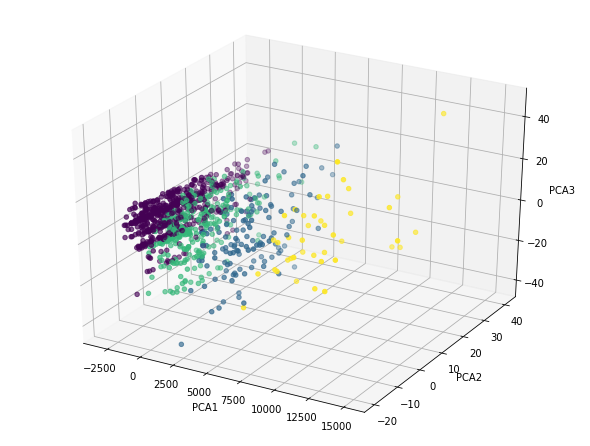

In [165]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

ax.scatter(finalDf['PC 1'], finalDf['PC 2'], finalDf['PC 3'], c = k_means.labels_.astype(np.float))

### Hierarchical Clustering

In [78]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

##### Ward

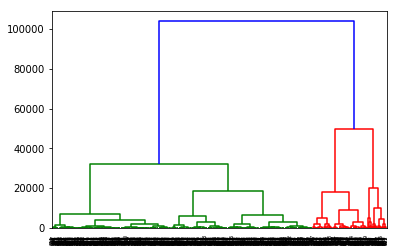

In [79]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [80]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labelw = model.labels_

In [169]:
cluster['label_ward'] = pd.DataFrame(model.labels_)
cluster.head()

,label_kmeans,label_ward
0,3,2
1,0,1
2,3,2
3,0,1
4,2,2


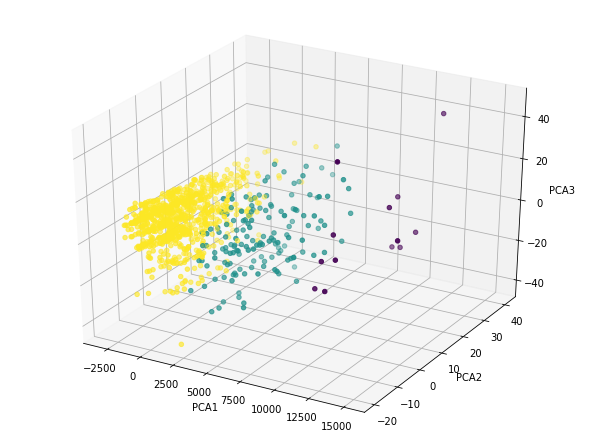

In [170]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

ax.scatter(finalDf['PC 1'], finalDf['PC 2'], finalDf['PC 3'], c = model.labels_.astype(np.float))

##### Single Linkage

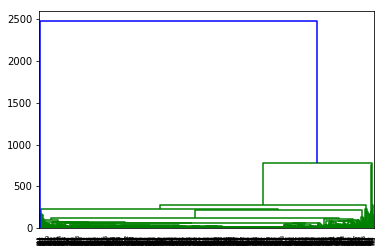

In [81]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

In [171]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model.fit(X)
labelsl = model.labels_

In [172]:
cluster['label_sl'] = pd.DataFrame(model.labels_)
cluster.head()

,label_kmeans,label_ward,label_sl
0,3,2,0
1,0,1,0
2,3,2,0
3,0,1,0
4,2,2,0


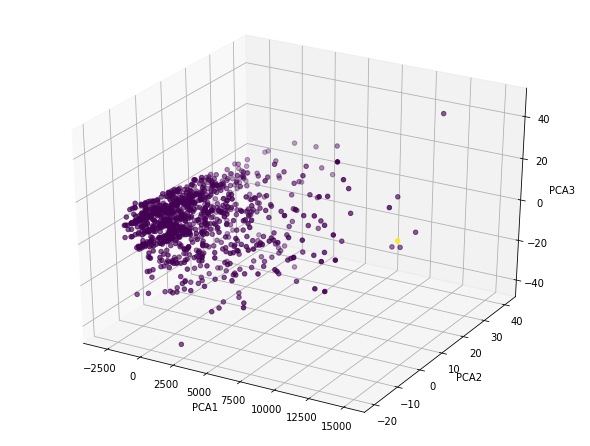

In [173]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

ax.scatter(finalDf['PC 1'], finalDf['PC 2'], finalDf['PC 3'], c = model.labels_.astype(np.float))

##### Average Linkage

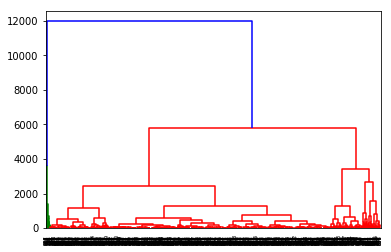

In [83]:
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

In [175]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(X)
labels = model.labels_

In [176]:
cluster['label_al'] = pd.DataFrame(model.labels_)
cluster.head()

,label_kmeans,label_ward,label_sl,label_al
0,3,2,0,2
1,0,1,0,1
2,3,2,0,2
3,0,1,0,1
4,2,2,0,2


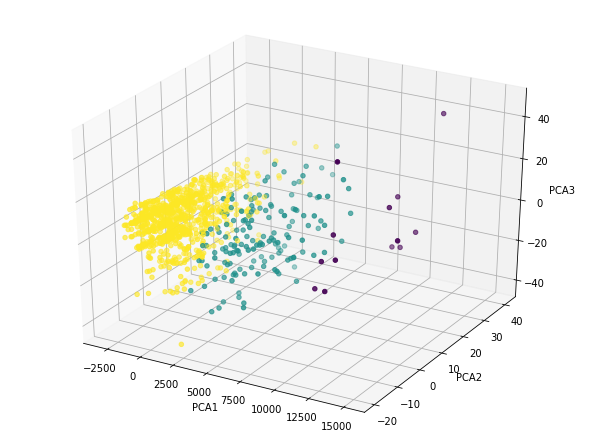

In [177]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

ax.scatter(finalDf['PC 1'], finalDf['PC 2'], finalDf['PC 3'], c = model.labels_.astype(np.float))

##### Complete Linkage

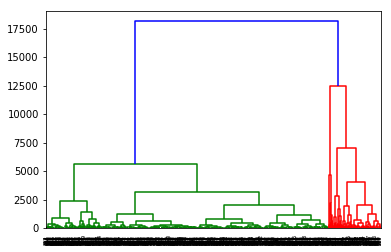

In [85]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

In [179]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

In [180]:
cluster['label_cl'] = pd.DataFrame(model.labels_)
cluster.head()

,label_kmeans,label_ward,label_sl,label_al,label_cl
0,3,2,0,2,1
1,0,1,0,1,0
2,3,2,0,2,1
3,0,1,0,1,0
4,2,2,0,2,1


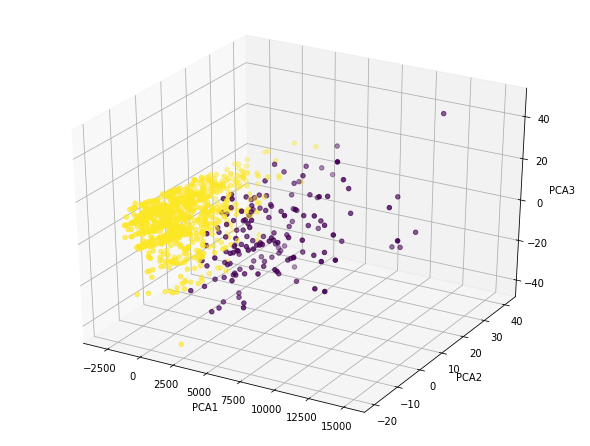

In [181]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

ax.scatter(finalDf['PC 1'], finalDf['PC 2'], finalDf['PC 3'], c = model.labels_.astype(np.float))

### DBSCAN

In [183]:
from sklearn.cluster import DBSCAN
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [214]:
dbscan = DBSCAN(min_samples=20, eps =250)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=250, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=20, n_jobs=None, p=None)

In [215]:
print(dbscan.labels_)

[ 0  1  0 -1  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0
  0  0  0  0  0  1  0  0  1  0  0  0  1  0  0  0  0  0  1  1  1  0  0  0
  2  0  0  1  0  0  0  0  1 -1  0  1  0  0  0 -1  0  0  0  0  0  0 -1  0
  0  1  0  0  0  0 -1  0  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0  2  0  0  0  0  0 -1  1  1  2  0  0  0  1  2  0  0  2  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0 -1  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  2 -1  0  0  0  0  0  0  0  0  2  0  0  0  0
  0  0  0  0  0  0  0  2  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  2  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
  0  0  1  0 -1  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  2
  0  0  0 -1  1  0  2 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0

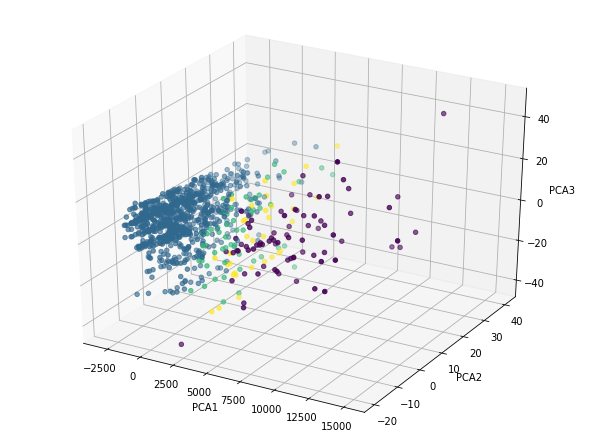

In [216]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

ax.scatter(finalDf['PC 1'], finalDf['PC 2'], finalDf['PC 3'], c = dbscan.labels_.astype(np.float))

**Menurut saya, hasil cluster terbaik menggunakan algoritma K-means karena berdasarkan visualisasi, pembagian data terlihat jelas terbagi menjadi 4 cluster.**

In [278]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


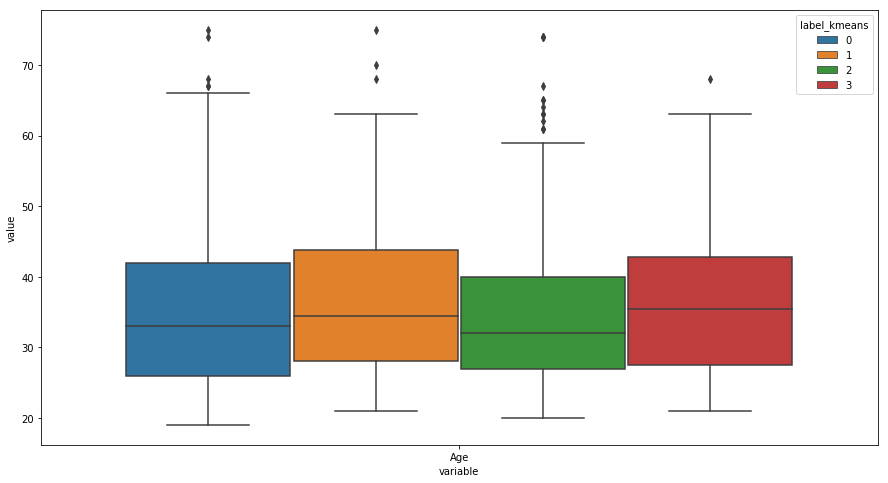

In [229]:
dff2=pd.melt(df[['Age', 'label_kmeans']],id_vars='label_kmeans')
sns.boxplot(y="value", x="variable", hue='label_kmeans', data=dff2)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

**Berdasarkan umurnya, tiap cluster memiliki perbedaan ciri umur yang sedikit berbeda satu sama lain, dilihat berdasarkan mediannya.**

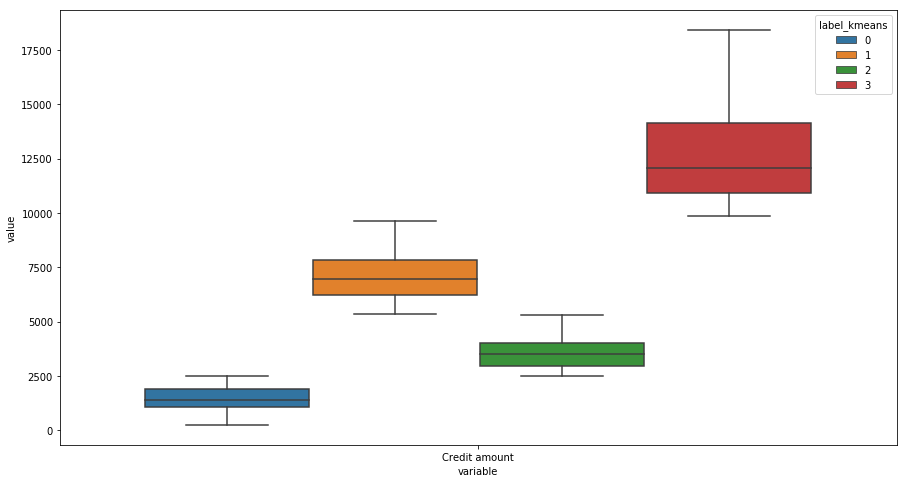

In [230]:
dff2=pd.melt(df[['Credit amount', 'label_kmeans']],id_vars='label_kmeans')
sns.boxplot(y="value", x="variable", hue='label_kmeans', data=dff2)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Berdasarkan Credit amount, tiap cluster memiliki ciri yang berbeda signifikan di mana cluster 0 adalah kelompok customer dengan credit amount berkisar <=2500, cluster 1 adalah kelompok customer dengan credit amount berkisar 5000 s.d. 10000, cluster 2 adalah kelompok customer dengan credit amount berkisar 2500 s.d. 5000, dan cluster 3 adalah kelompok customer dengan credit amount berkisar >10000.

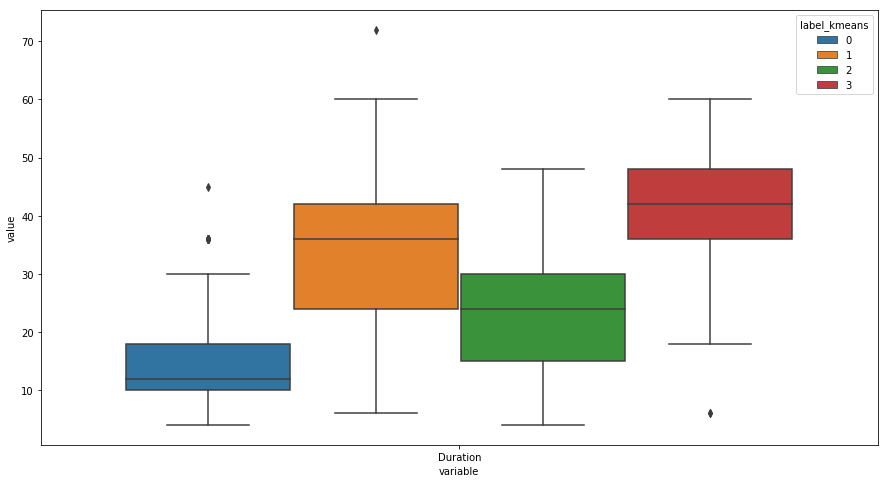

In [231]:
dff2=pd.melt(df[['Duration', 'label_kmeans']],id_vars='label_kmeans')
sns.boxplot(y="value", x="variable", hue='label_kmeans', data=dff2)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Berdasarkan visualisasi di atas, terlihat perbedaan ciri yang cukup signifikan tiap cluster, di mana cluster 0 dicirikan dengan kelompok customer yang mayoritas berada di rentang umur 10-18; cluster 1 dicirikan dengan kelompok customer yang mayoritas berada di rentang umur 22-42; cluster 2 dicirikan dengan kelompok customer yang mayoritas berada di rentang umur 15-30; dan cluster 3 dicirikan dengan kelompok customer yang mayoritas berada di rentang umur 35-50.

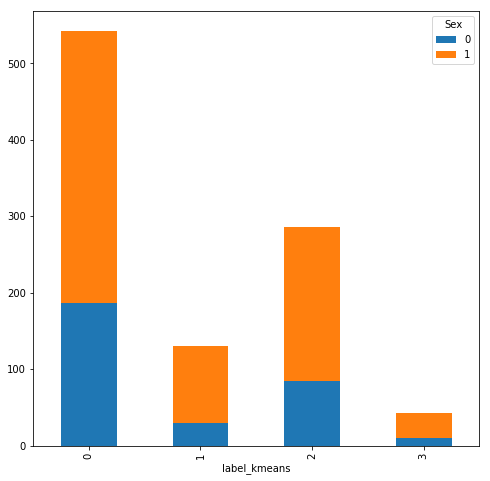

In [254]:
grouped = df.groupby(['Sex','label_kmeans'])
sex = pd.crosstab(index=df["label_kmeans"], columns=df["Sex"])
sex.plot(kind="bar", figsize=(8,8),stacked=True)

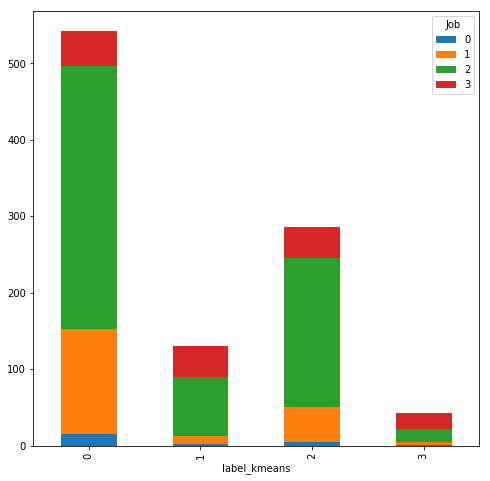

In [245]:
grouped = df.groupby(['Job','label_kmeans'])
job = pd.crosstab(index=df["label_kmeans"], columns=df["Job"])
job.plot(kind="bar", figsize=(8,8),stacked=True)

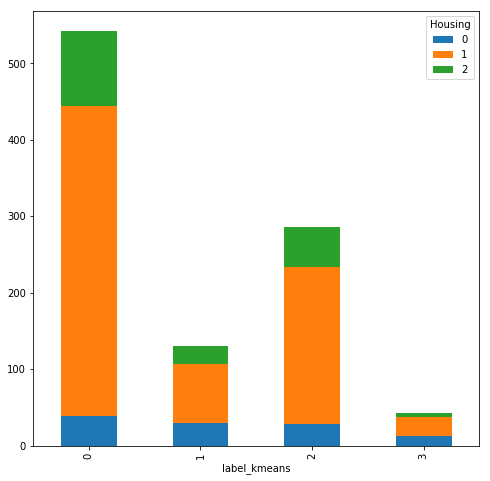

In [246]:
grouped = df.groupby(['Housing','label_kmeans'])
house = pd.crosstab(index=df["label_kmeans"], columns=df["Housing"])
house.plot(kind="bar", figsize=(8,8),stacked=True)

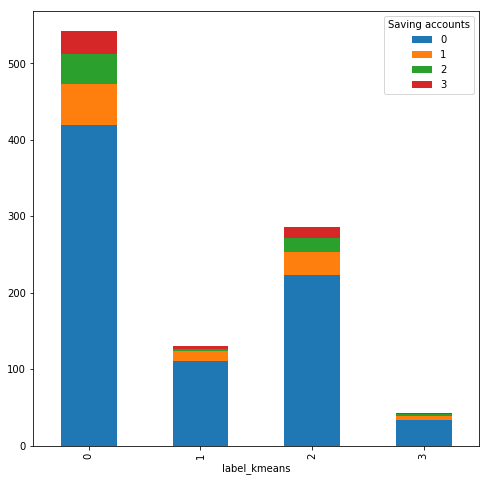

In [248]:
grouped = df.groupby(['Saving accounts','label_kmeans'])
saving = pd.crosstab(index=df["label_kmeans"], columns=df["Saving accounts"])
saving.plot(kind="bar", figsize=(8,8),stacked=True)

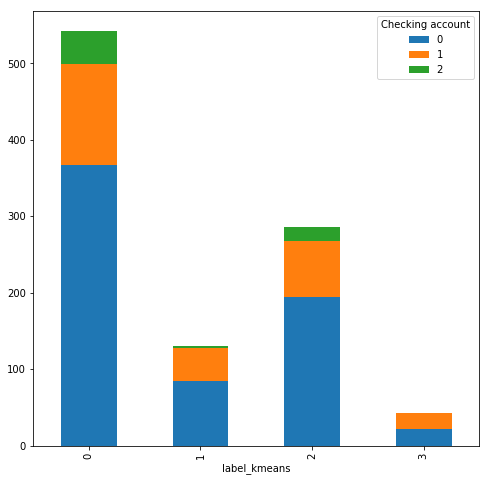

In [251]:
grouped = df.groupby(['Checking account','label_kmeans'])
checking = pd.crosstab(index=df["label_kmeans"], columns=df["Checking account"])
checking.plot(kind="bar", figsize=(8,8),stacked=True)

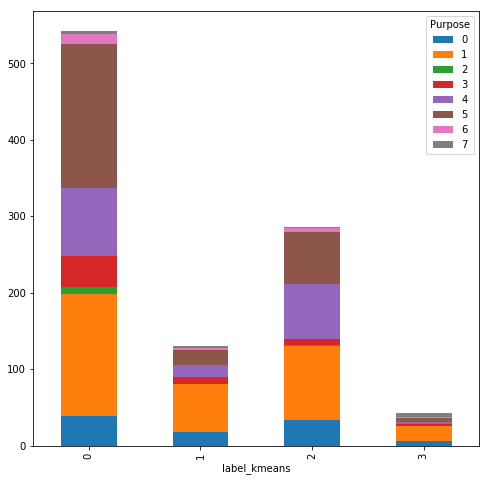

In [252]:
grouped = df.groupby(['Purpose','label_kmeans'])
purpose = pd.crosstab(index=df["label_kmeans"], columns=df["Purpose"])
purpose.plot(kind="bar", figsize=(8,8),stacked=True)

In [247]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'label_kmeans'],
      dtype='object')

Sebelumnya telah dilakukan visualisasi untuk karakteristik tiap cluster. Variabel yang paling mencirikan karakteristik tiap cluster adalah credit amount dan duration. <br>
Cluster 0 (low risk) <br>
Ciri2: credit amount dan duration yang rendah <br>
Cluster 1 <br>
Ciri2: credit amount dan duration yang cukup tinggi <br>
Cluster 2 <br>
Ciri2: credit amount dan duration yang cukup rendah <br>
Cluster 3 <br>
Ciri2: credit amount dan duration yang tinggi <br>

Pembagian cluster ini dapat dijadikan strategi bisnis ke depan untuk meningkatkan jumlah customer yang melakukan kredit berdasarkan credit amount dan duration.

